In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize, special
import pandas as pd
from statsmodels.stats.multitest import multipletests

# Hypothesis testing, MLE, Bootstrap

<img src="figs_V/xkcd_V.png">

## Bootstrap

### Bootstrap example

Bootstrapping is a resampling method that helps estimate the sampling distribution of a statistic by repeatedly drawing samples with replacement from the original dataset.

A nutritionist records the daily calorie intake of 10 individuals:

    Calories=[1800,1950,2200,2100,2500,2300,1750,1900,2050,2250]

We want to estimate the median (this is the test statistic) with bootstrapping, therefore we need the following:
- The expectation value (mean of the bootstrapped medians).
- The standard error of the median.

In [2]:
# Original dataset (calories)
data = np.array([1800, 1950, 2200, 2100, 2500, 2300, 1750, 1900, 2050, 2250])

# Number of bootstrap samples
B = 1000

# Store bootstrap medians
bootstrap_medians = np.array([
    np.median(np.random.choice(data, size=len(data), replace=True))
    for i in range(B)
])

# Compute expectation value (mean of bootstrap medians)
expectation_median = np.mean(bootstrap_medians)

# Compute standard error (std of bootstrap medians)
standard_error = np.std(bootstrap_medians, ddof=1)

# Print results
print(f"Observed Median: {np.median(data)}")
print(f"Expectation Value (Bootstrapped Mean): {expectation_median:.2f}")
print(f"Standard Error of the Median: {standard_error:.2f}")

Observed Median: 2075.0
Expectation Value (Bootstrapped Mean): 2074.50
Standard Error of the Median: 106.34


### Bootstrap confidence intervals

We can compute a confidence interval for the median using the percentile method and the pivotal method:
- A 95% confidence interval corresponds to the 2.5th and 97.5th percentiles of the bootstrapped medians.
- We simply sort the bootstrapped medians and extract these percentiles.
- Then, we center the interval around the observed median for the pivotal method.

Useful when the data is not normally distributed or when we have small samples.

In [3]:
# Compute 95% confidence interval using the percentile method
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)

# Print the results
print(f"95% Confidence Interval for the Median: ({lower_bound:<.2f}, {upper_bound:<.2f})")
print(f"This means that we are 95% confident that the population median lies between {lower_bound:<.2f} and {upper_bound:<.2f}.")

95% Confidence Interval for the Median: (1875.00, 2250.00)
This means that we are 95% confident that the population median lies between 1875.00 and 2250.00.


In [21]:
# Compute the pivotal confidence interval
observed_median = np.median(data)
pivotal_lower = 2 * observed_median - upper_bound
pivotal_upper = 2 * observed_median - lower_bound

# Print results
print(f"Observed Median: {observed_median}")
print(f"Pivotal 95% Confidence Interval for the Median: ({pivotal_lower:.2f}, {pivotal_upper:.2f})")

Observed Median: 2075.0
Pivotal 95% Confidence Interval for the Median: (1900.00, 2275.00)


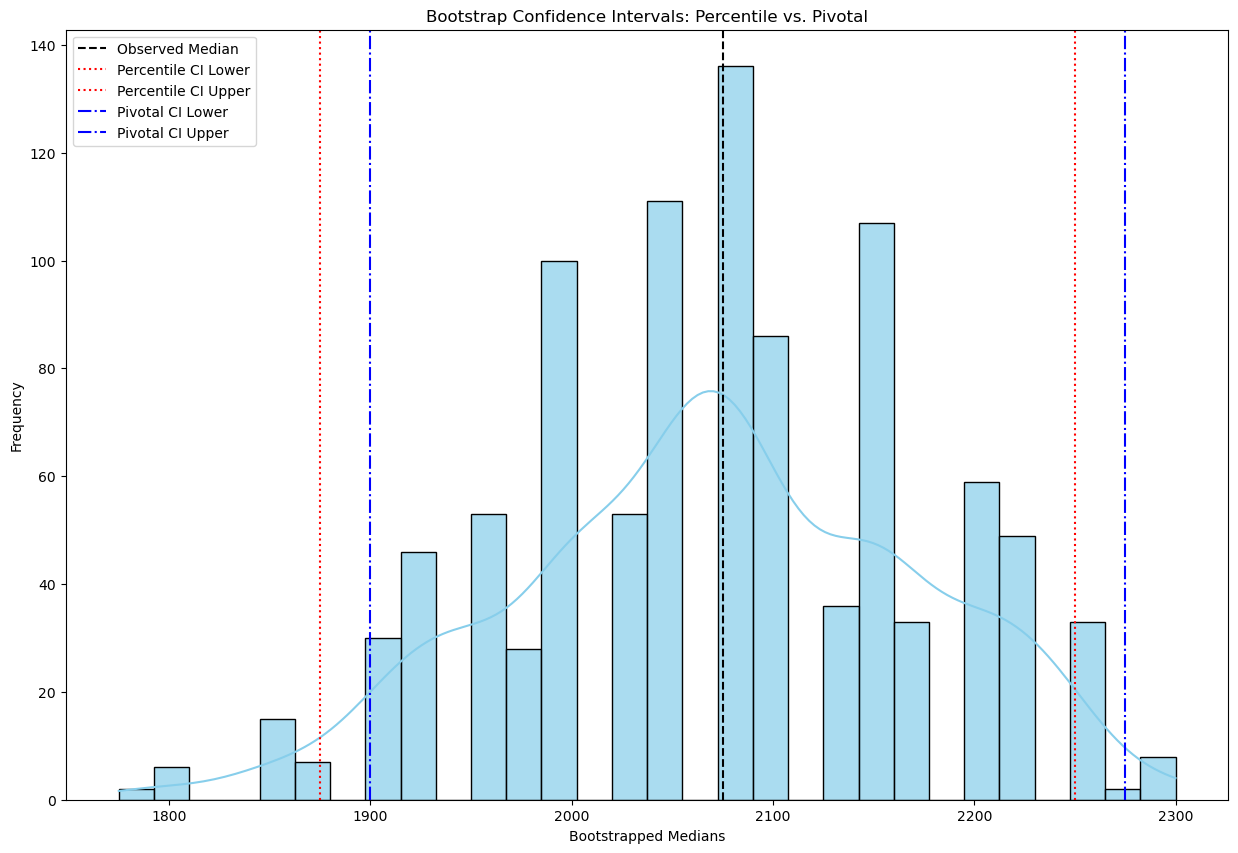

In [25]:
plt.figure(figsize = (15, 10))

sns.histplot(bootstrap_medians, bins=30, kde=True, color='skyblue', alpha=0.7)

# Plot observed median
plt.axvline(observed_median, color='black', linestyle='dashed', label="Observed Median")

# Plot percentile confidence interval
plt.axvline(lower_bound, color='red', linestyle='dotted', label="Percentile CI Lower")
plt.axvline(upper_bound, color='red', linestyle='dotted', label="Percentile CI Upper")

# Plot pivotal confidence interval
plt.axvline(pivotal_lower, color='b', linestyle='dashdot', label="Pivotal CI Lower")
plt.axvline(pivotal_upper, color='b', linestyle='dashdot', label="Pivotal CI Upper")

# Labels and legend
plt.xlabel("Bootstrapped Medians")
plt.ylabel("Frequency")
plt.title("Bootstrap Confidence Intervals: Percentile vs. Pivotal")
plt.legend()
plt.show()

Key takeaways:
- The percentile confidence interval is directly based on the bootstrap sample percentiles.
- The pivotal confidence interval adjusts for bias and is more centered around the true median.
- The two methods can differ slightly, especially with small samples or skewed data. In the latter case, the pivotal method is better.

## Method of Moments (MME or MoM)

Assume the data are drawn from an exponential distribution and we want to estimate the $\lambda$ parameter.
- The probability density function is:
    $$f(x; \lambda) = \lambda e^{-\lambda x}, \quad x \geq 0.$$
- The theoretical mean is:
    $$E[X] = \frac{1}{\lambda}.$$
- Given a sample:
    $$x = [2,\, 3,\, 1,\, 4,\, 2],$$
    we first compute the sample mean:
    $$\bar{x} = \frac{2 + 3 + 1 + 4 + 2}{5} = \frac{12}{5} = 2.4.$$
- Set the theoretical mean equal to the sample mean:
    $$\frac{1}{\lambda} = \bar{x} \quad \Rightarrow \quad \hat{\lambda} = \frac{1}{\bar{x}}.$$
- Substitute the computed sample mean:
    $$\hat{\lambda} = \frac{1}{2.4} \approx 0.4167.$$

## Maximum likelihood estimation (MLE)

Assume the data are drawn from an exponential distribution and we want to estimate the $\lambda$ parameter.
- The probability density function is:
    $$f(x;\lambda)= \lambda e^{-\lambda x}, \quad x \geq 0.$$
- The likelihood function for a sample $x_1, x_2, \ldots, x_n$ is:
    $$L(\lambda)= \prod_{i=1}^n \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum_{i=1}^n x_i}.$$
- Taking the natural logarithm gives the log-likelihood:
    $$\ell(\lambda)= \ln L(\lambda)= n\ln(\lambda)-\lambda \sum_{i=1}^n x_i.$$

- Differentiate the log-likelihood with respect to $\lambda$:
    $$\frac{d\ell}{d\lambda} = \frac{n}{\lambda} - \sum_{i=1}^n x_i.$$

- Set the derivative equal to zero and solve for $\lambda$:
    $$\frac{n}{\lambda} - \sum_{i=1}^n x_i = 0.$$

- We get the estimated value by:
    $$\frac{n}{\lambda} = \sum_{i=1}^n x_i \quad \Longrightarrow \quad \hat{\lambda} = \frac{n}{\sum_{i=1}^n x_i}.$$

- Suppose we have the sample:
    $$x = [2,\, 3,\, 1,\, 4,\, 2].$$

- The sample size and sum are:
    $$n = 5 \quad \text{and} \quad \sum_{i=1}^n x_i = 2 + 3 + 1 + 4 + 2 = 12.$$

- We substitute these and get:
    $$\hat{\lambda} = \frac{5}{12} \approx 0.4167.$$

## Method of Moments (MME) and Maximum likelihood estimation (MLE)

### 1. Exponential distribution

Example: The exponential distribution has the probability density function:\
$$f(x∣\lambda)=\lambda e^{−\lambda x},\quad x>0,\lambda>0$$
- The population mean is:
    $$\mathbb{E}[X]=\frac{1}{\lambda}$$
1. MME: We estimate $\lambda$ by equating it to the sample mean:
    $$\frac{1}{\lambda}=\overline{X}\Longrightarrow \hat{\lambda}=\frac{1}{\overline{X}}$$
2. MLE finds $\lambda$ that maximizes the likelihood function:
    $$L(\lambda)=\prod_{i=1}^n \lambda e^{−\lambda x_i}$$
    - Taking the log-likelihood and differentiating:\
        $$\hat{\lambda}=\frac{1}{\overline{X}}$$

- For an exponential distribution, MME and MLE give the same estimator.

True λ: 5
Sample Mean: 0.1829
Estimated λ (MoM): 5.4660
Estimated λ (MLE): 5.4660


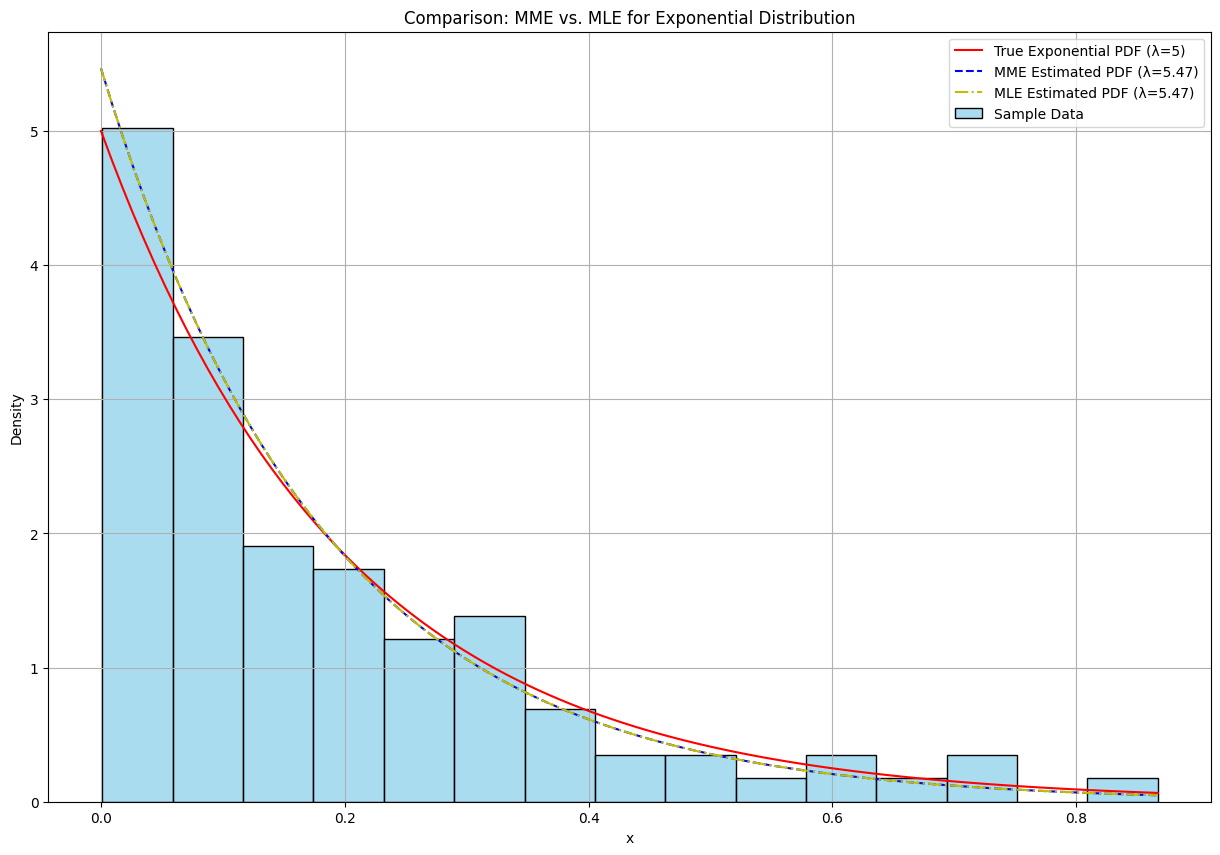

In [4]:
# Simulate data from an Exponential(λ=2) distribution
np.random.seed(42)
true_lambda = 5
sample_size = 100
sample = np.random.exponential(scale=1/true_lambda, size=sample_size)  # Scale = 1/λ

# Method of Moments Estimation
sample_mean = np.mean(sample)
lambda_mom = 1 / sample_mean  # MoM estimate

# Maximum Likelihood Estimation (for exponential, same as MME)
lambda_mle = 1 / sample_mean  # MLE estimate

# Print results
print(f"True λ: {true_lambda}")
print(f"Sample Mean: {sample_mean:<.4f}")
print(f"Estimated λ (MoM): {lambda_mom:<.4f}")
print(f"Estimated λ (MLE): {lambda_mle:<.4f}")

# Plot histogram of sample data with estimated distributions
x_vals = np.linspace(0, max(sample), 100)
pdf_true = true_lambda * np.exp(-true_lambda * x_vals)  # True PDF
pdf_mom = lambda_mom * np.exp(-lambda_mom * x_vals)  # MME estimated PDF
pdf_mle = lambda_mle * np.exp(-lambda_mle * x_vals)  # MLE estimated PDF

plt.figure(figsize = (15, 10))
sns.histplot(sample, bins=15, kde=False, stat="density", color='skyblue', alpha=0.7, label="Sample Data")
plt.plot(x_vals, pdf_true, 'r-', label=f"True Exponential PDF (λ={true_lambda})")
plt.plot(x_vals, pdf_mom, 'b--', label=f"MME Estimated PDF (λ={lambda_mom:.2f})")
plt.plot(x_vals, pdf_mle, 'y-.', label=f"MLE Estimated PDF (λ={lambda_mle:.2f})")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Comparison: MME vs. MLE for Exponential Distribution")
plt.legend()
plt.grid()
plt.show()

### 2. Normal distribution

1. Method of Moments (MME)
    - We match the sample moments to the population moments:
        - Mean:
            $$\mathbb{E}[X]=\mu\Longrightarrow\hat{\mu}=\overline{X}$$
        - Variance:
        $$\mathbb{E}[X^2]=\sigma^2+\mu^2\Longrightarrow\hat{\sigma}^2=\frac{1}{n}\sum\left(X_i−\overline{X}\right)^2$$
        - Dividing by $n$ instead of $n−1$ gives the biased MME estimator.
2. Maximum Likelihood Estimation (MLE)
    - Same as MME for normal distribution.
    - MLE is biased for small $n$, but asymptotically unbiased.
- For small sample sizes, MLE underestimates variance, while MME can be biased too.
- For larger samples, MLE is preferred because it is asymptotically unbiased and efficient.

True μ: 5, True σ²: 4
MoM Estimates → μ: 4.7923, σ²: 3.2661
MLE Estimates → μ: 4.7923, σ²: 3.2661


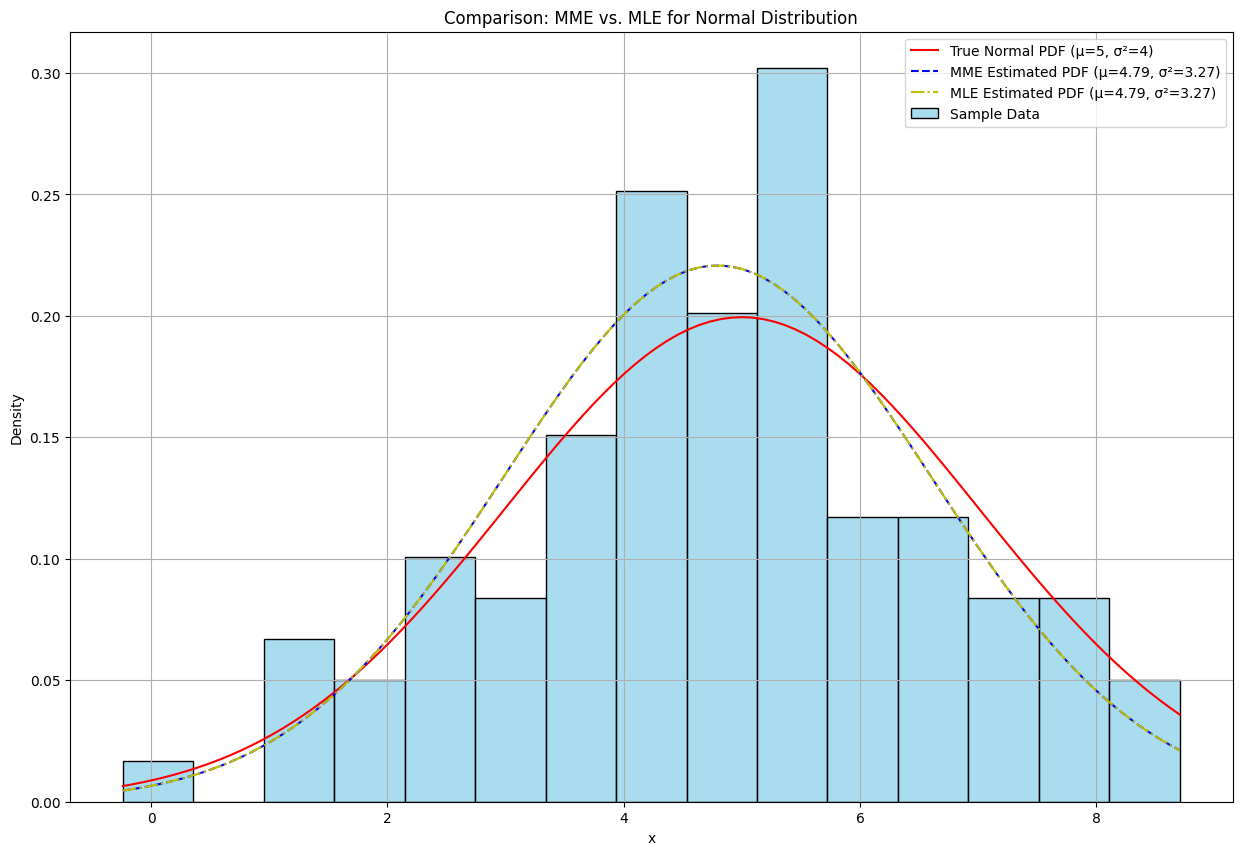

In [5]:
# Simulate data from a Normal(μ=5, σ=2) distribution
np.random.seed(42)
true_mu = 5
true_sigma = 2
sample_size = 100
sample = np.random.normal(loc=true_mu, scale=true_sigma, size=sample_size)

# Method of Moments Estimation
mu_mom = np.mean(sample)  # MoM mean estimate
sigma2_mom = np.mean((sample - mu_mom) ** 2)  # MME variance estimate

# Maximum Likelihood Estimation (for normal, same formulas as MoM)
mu_mle = np.mean(sample)  # MLE mean estimate
sigma2_mle = np.mean((sample - mu_mle) ** 2)  # MLE variance estimate

# Print results
print(f"True μ: {true_mu}, True σ²: {true_sigma**2}")
print(f"MoM Estimates → μ: {mu_mom:.4f}, σ²: {sigma2_mom:<.4f}")
print(f"MLE Estimates → μ: {mu_mle:.4f}, σ²: {sigma2_mle:<.4f}")

# Plot histogram with estimated distributions
x_vals = np.linspace(min(sample), max(sample), 100)
pdf_true = stats.norm.pdf(x_vals, true_mu, np.sqrt(true_sigma**2))  # True PDF
pdf_mom = stats.norm.pdf(x_vals, mu_mom, np.sqrt(sigma2_mom))  # MME estimated PDF
pdf_mle = stats.norm.pdf(x_vals, mu_mle, np.sqrt(sigma2_mle))  # MLE estimated PDF

plt.figure(figsize = (15, 10))
sns.histplot(sample, bins=15, kde=False, stat="density", color='skyblue', alpha=0.7, label="Sample Data")
plt.plot(x_vals, pdf_true, 'r-', label=f"True Normal PDF (μ={true_mu}, σ²={true_sigma**2})")
plt.plot(x_vals, pdf_mom, 'b--', label=f"MME Estimated PDF (μ={mu_mom:.2f}, σ²={sigma2_mom:.2f})")
plt.plot(x_vals, pdf_mle, 'y-.', label=f"MLE Estimated PDF (μ={mu_mle:.2f}, σ²={sigma2_mle:.2f})")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Comparison: MME vs. MLE for Normal Distribution")
plt.legend()
plt.grid()
plt.show()

### 3. Gamma distribution

1. Gamma distribution definition
    - Probability density function (PDF):
    $$f(x∣k,\theta)=\frac{x^{k-1}e^{-x/\theta}}{\theta^k\Gamma(k)}$$
        where:
        - $k$ (shape parameter) controls the distribution shape.
        - $\theta$ (scale parameter) stretches or shrinks the distribution.

    - Population Moments:
        - Mean:
        $$\mathbb{E}[X]=k\theta$$
        - Variance:
        $$Var(X)=k\theta^2$$
2. Method of Moments
    - Using sample mean $\overline{X}$ and sample variance $S^2$, we solve:
    $$\overline{X}=k\theta$$
    $$S^2=k\theta^2$$
    - Solving for $k$ and $\theta$:
    $$\hat{k}=\frac{\overline{X}^2}{S^2},\quad\hat{\theta}=\frac{S^2}{\overline{X}}$$
3. Maximum likelihood estimation
    - $k$ is estimated by solving the equation:
    $$ln⁡\left(\overline{X}\right)−\frac{1}{n}\sum ln⁡X_i=ln\left(\hat{k}\right) - \psi\left(\hat{k}\right)$$
        where $\psi$ is the digamma function. We solve this numerically.
    - $\theta$ is estimated as:
    $$\hat{\theta}=\frac{\overline{X}}{\hat{k}}$$

#### Special note: An additional problem can arise when the numerical method used to compute the MLE falls short. It might seem that the MME is a better estimator when increasing the sample size, meanwhile it is not the MLE itself but its solver that is at fault for slower convergence.

True k: 3, True θ: 2
MoM Estimates → k: 3.8689, θ: 1.5109
MLE Estimates → k: 1.3192, θ: 4.4309


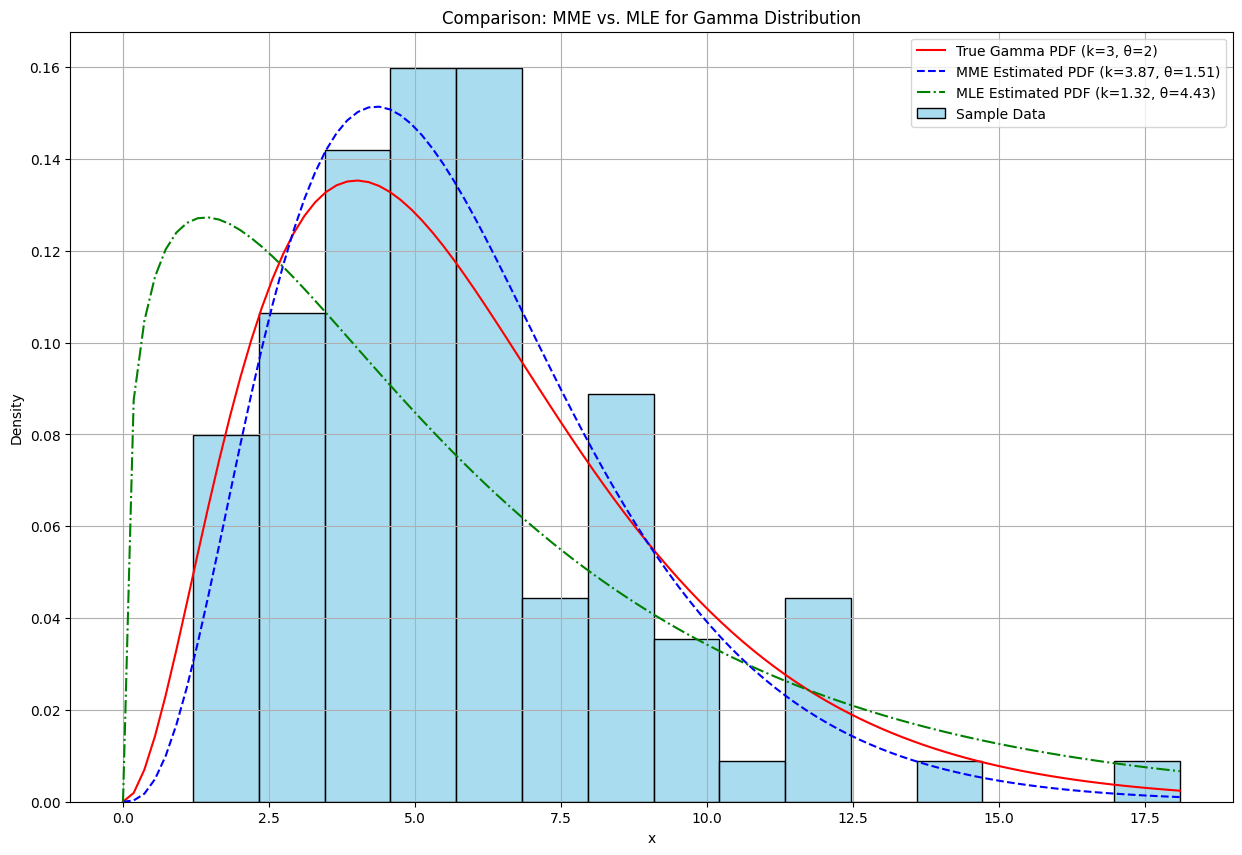

In [6]:
# Simulate data from a Gamma(k=3, θ=2) distribution
np.random.seed(42)
true_k = 3
true_theta = 2
sample_size = 100
sample = np.random.gamma(shape=true_k, scale=true_theta, size=sample_size)

# Method of Moments Estimation
sample_mean = np.mean(sample)
sample_variance = np.var(sample, ddof=0)

k_mom = sample_mean**2 / sample_variance
theta_mom = sample_variance / sample_mean

# Maximum Likelihood Estimation (Numerical Solution for k)
def mle_equation(k, mean, log_mean):
    return np.log(mean) - log_mean - special.digamma(k) - np.log(k) #Digamma is the derivative of the Gamma function's logarithm

log_sample_mean = np.mean(np.log(sample))
k_mle = optimize.brentq(mle_equation, 0.1, 10, args=(sample_mean, log_sample_mean))
theta_mle = sample_mean / k_mle

# Print results
print(f"True k: {true_k}, True θ: {true_theta}")
print(f"MoM Estimates → k: {k_mom:.4f}, θ: {theta_mom:<.4f}")
print(f"MLE Estimates → k: {k_mle:.4f}, θ: {theta_mle:<.4f}")

# Plot histogram with estimated distributions
x_vals = np.linspace(0, max(sample), 100)
pdf_true = stats.gamma.pdf(x_vals, true_k, scale=true_theta)  # True PDF
pdf_mom = stats.gamma.pdf(x_vals, k_mom, scale=theta_mom)  # MME estimated PDF
pdf_mle = stats.gamma.pdf(x_vals, k_mle, scale=theta_mle)  # MLE estimated PDF

plt.figure(figsize = (15, 10))
sns.histplot(sample, bins=15, kde=False, stat="density", color='skyblue', alpha=0.7, label="Sample Data")
plt.plot(x_vals, pdf_true, 'r-', label=f"True Gamma PDF (k={true_k}, θ={true_theta})")
plt.plot(x_vals, pdf_mom, 'b--', label=f"MME Estimated PDF (k={k_mom:.2f}, θ={theta_mom:.2f})")
plt.plot(x_vals, pdf_mle, 'g-.', label=f"MLE Estimated PDF (k={k_mle:.2f}, θ={theta_mle:.2f})")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Comparison: MME vs. MLE for Gamma Distribution")
plt.legend()
plt.grid()
plt.show()

## Multiple testing

### Bonferroni correction

A simple and widely used method to control the family-wise error rate (FWER) when performing multiple hypothesis tests. It adjusts the significance level to reduce the likelihood of making Type I errors (false positives).

- When conducting multiple hypothesis tests, the probability of at least one false positive increases. If we test $m$ independent hypotheses at a standard significance level $\alpha$, the probability of making at least one false rejection of $H_0$ (Type I error) is:
    $$P(\text{At least one false positive})=1−(1−\alpha)^m.$$
- For example, if we conduct $m=5$ independent tests at $\alpha=0.05$:
    $$P(\text{At least one false positive})=1−(0.95)^5≈0.226.$$
- This means we have a 22.6% chance of wrongly rejecting at least one null hypothesis, much higher than the intended 5%.
- To control the overall error rate at a desired level $\alpha$, the Bonferroni correction modifies the individual test significance level:
    $$\alpha'=\frac{\alpha}{m}$$
- Thus, a test is considered statistically significant only if its $p$-value is less than $\alpha'$.

Example: A researcher tests $m = 4$ different drugs to see if they lower blood pressure, using an overall significance level of $\alpha=0.05$.
- We adjust the significance level:
    $$\alpha'=\frac{0.05}{4}=0.0125$$
- The corrected $p$-values are obtained by multiplying each original $p$-value by the number of tests $m$, while ensuring they do not exceed 1.
    $$p_{Bonferroni}=\text{min}\left(m\cdot p_{original},1\right)$$
- Then, we compare the new $p$-values to the original $\alpha$ and those that are lower than $\alpha$ remain significant.
- Or, similarly we compare the original $p$-values to the new $\alpha'$ and we would get the same results.

| Drug | Original $p$-value | Bonferroni Corrected $p$-value | Significant (without correction) | Significant (with Bonferroni) |
|------|-----------------|-----------------------------|---------------------------------|------------------------------|
| A    | 0.008           | 0.032                      |  Yes                          |  Yes                        |
| B    | 0.015           | 0.060                      |  Yes                          |  No                         |
| C    | 0.002           | 0.008                      |  Yes                          |  Yes                        |
| D    | 0.030           | 0.120                      |  Yes                          |  No                         |

- Without correction, all tests seem significant.
- With Bonferroni correction, only drugs A and C remain significant.

Additional properties about the Bonferroni correction:
- Very simple and conservative, making it less likely to make a mistake.
- Can be too strict, increasing Type II errors (false negatives).
- Not ideal for dependent tests, as it assumes independence among tests.

In [7]:
# Given p-values from multiple tests
p_values = np.array([0.008, 0.015, 0.002, 0.030])

# Number of tests
m = len(p_values)
alpha = 0.05  # Overall significance level

# Apply Bonferroni correction
reject, p_corrected, _, alpha_corrected = multipletests(p_values, alpha=alpha, method='bonferroni')
#Here alpha_corrected = alpha / m

# Create results dataframe
old_results = pd.DataFrame({
    "Drug": ["A", "B", "C", "D"],
    "Original p-value": p_values,
    "Original significance": alpha,
    "Significant": p_values < alpha,
})

# Display results
print("The test without correction:")
old_results

The test without correction:


,Drug,Original p-value,Original significance,Significant
0,A,0.008,0.05,True
1,B,0.015,0.05,True
2,C,0.002,0.05,True
3,D,0.030,0.05,True


In [8]:
bonf_results_1 = pd.DataFrame({
    "Drug": ["A", "B", "C", "D"],
    "Original p-value": p_values,
    "Bonferroni Corrected significance": alpha_corrected,
    "Significant": p_values < alpha_corrected,
})

print("Bonferroni correction when comparing the original p-values to alpha/m:")
bonf_results_1

Bonferroni correction when comparing the original p-values to alpha/m:


,Drug,Original p-value,Bonferroni Corrected significance,Significant
0,A,0.008,0.0125,True
1,B,0.015,0.0125,False
2,C,0.002,0.0125,True
3,D,0.030,0.0125,False


In [9]:
bonf_results_2 = pd.DataFrame({
    "Drug": ["A", "B", "C", "D"],
    "Bonferroni Corrected p-value": p_corrected,
    "Original significance": alpha,
    "Significant": p_values < alpha_corrected,
})

print("Bonferroni correction when comparing the corrected p-values to alpha:")
bonf_results_2

Bonferroni correction when comparing the corrected p-values to alpha:


,Drug,Bonferroni Corrected p-value,Original significance,Significant
0,A,0.032,0.05,True
1,B,0.060,0.05,False
2,C,0.008,0.05,True
3,D,0.120,0.05,False


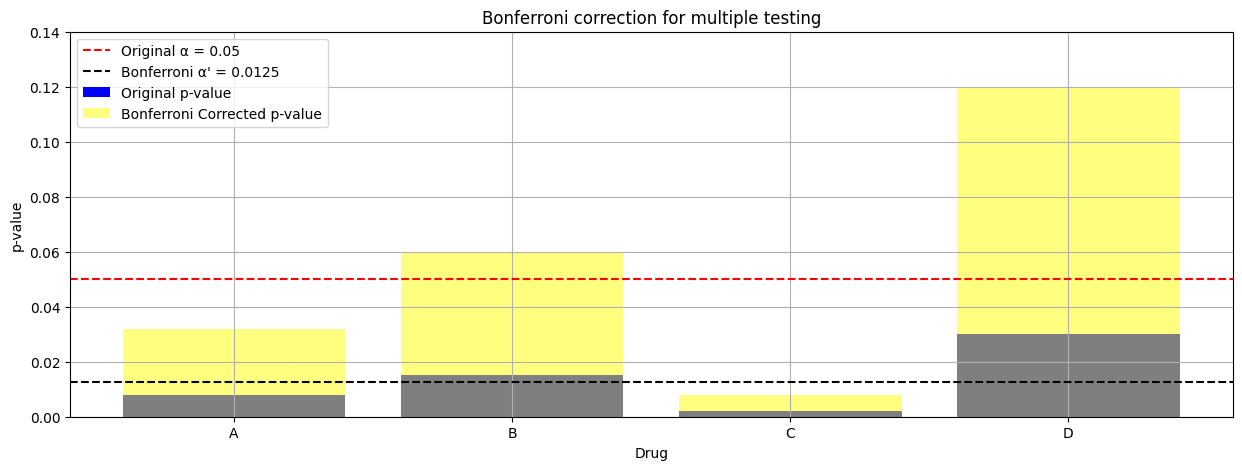

In [10]:
plt.figure(figsize=(15, 5))
plt.bar(old_results["Drug"], old_results["Original p-value"], color='blue', alpha=1, label="Original p-value")
plt.bar(bonf_results_2["Drug"], bonf_results_2["Bonferroni Corrected p-value"], color='yellow', alpha=0.5, label="Bonferroni Corrected p-value")
plt.axhline(y=alpha, color='r', linestyle='--', label=f"Original α = {alpha}")
plt.axhline(y=alpha_corrected, color='black', linestyle='--', label=f"Bonferroni α' = {alpha_corrected:.4f}")
plt.xlabel("Drug")
plt.ylabel("p-value")
plt.title("Bonferroni correction for multiple testing")
plt.legend()
plt.ylim(0, max(max(p_values), max(p_corrected)) + 0.02)
plt.grid()
plt.show()

### Benjamini-Hochberg (BH) Correction

This is used to control the False Discovery Rate (FDR) in multiple hypothesis testing. Unlike the Bonferroni correction, which is very strict and reduces Type I errors (false positives) at the cost of more Type II errors (false negatives), the BH correction provides a better balance between false positives and false negatives. When performing multiple hypothesis tests, we must account for the increased probability of false discoveries. The BH correction ranks the $p$-values and adjusts them to control the FDR, which is the expected proportion of false positives among all rejected null hypotheses.

For $m$ hypothesis tests, the steps are:
- Rank the $p$-values in ascending order:
$$p_{(1)}\leq p_{(2)}\leq...\leq p_{(m)}$$
- Compute the BH-adjusted threshold for each test:
$$\alpha_i=\frac{i}{m}\cdot\alpha$$
    where $i$ is the rank of the $p$-value, $m$ is the total number of tests, $\alpha$ is the desired overall significance level.
- Find the largest $p$-value $p_{(k)}$ that satisfies:
$$p_{(k)}\leq\alpha_k$$
- Reject all hypotheses with $p_{(i)}≤p_{(k)}$.

Example: A researcher tests 4 drugs for effectiveness in lowering blood pressure and performs 4 independent hypothesis tests at a significance level of $\alpha=0.05$.
- We rank $p$-values:
| Rank $i$ | Drug | $p$-value $p_{(i)}$ |
|------------|------|----------------|
| 1          | C    | 0.002          |
| 2          | A    | 0.008          |
| 3          | B    | 0.015          |
| 4          | D    | 0.030          |

- Then, we compute the BH thresholds:
| Rank $i$ | $p$-value $p_{(i)}$ | BH threshold $\alpha_i$ |
|------------|----------------|---------------------|
| 1          | 0.002          | $\frac{1}{4} \cdot 0.05 = 0.0125$ |
| 2          | 0.008          | $\frac{2}{4} \cdot 0.05 = 0.025$  |
| 3          | 0.015          | $\frac{3}{4} \cdot 0.05 = 0.0375$ |
| 4          | 0.030          | $\frac{4}{4} \cdot 0.05 = 0.050$  |

- Finally, we show the decisions:
| Drug | Original $p$-value | BH threshold | Significant (BH) |
|------|-----------------|----------------------|-----------------|
| C    | 0.002          | 0.0125               |  Yes |
| A    | 0.008          | 0.025                |  Yes |
| B    | 0.015          | 0.0375               |  Yes |
| D    | 0.030          | 0.050                |  Yes |

- The largest $p_{(k)}$ that satisfies the $p_{(k)}\leq\alpha_i$ is $0.030\leq0.050$, which is actually the largest $p$-value, meaning that all four drugs remained statistically significant.

In [11]:
# Given p-values from multiple tests
p_values = np.array([0.008, 0.015, 0.002, 0.030])

# Overall significance level
alpha = 0.05  

# Apply Benjamini-Hochberg correction
reject, _, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

# Create results dataframe
results = pd.DataFrame({
    "Drug": ["A", "B", "C", "D"],
    "Original p-value": p_values,
    "Significant (Benjamini-Hochberg)": reject
})

results

,Drug,Original p-value,Significant (Benjamini-Hochberg)
0,A,0.008,True
1,B,0.015,True
2,C,0.002,True
3,D,0.030,True


### Summary
- Bonferroni is best for high-stakes decisions (e.g., medical trials) because it strongly controls false positives.
- Benjamini-Hochberg is best for exploratory studies where we want to balance false positives and false negatives.
- If you want fewer false positives, use Bonferroni.
- If you want more discoveries while keeping false discoveries low, use Benjamini-Hochberg.

## Independence testing

Checking whether two categorical variables are statistically independent or if they show an association.
- $H_0$: The two variables are independent (no association).
- $H_1$: The two variables are dependent (there is an association).

The test is conducted using a contingency table. It summarizes the frequency of observations in two groups based on two categories. The example below shows the effectiveness of new drug vs a placebo.

|             | Recovered (Yes) | Not Recovered (No) | Total |
|------------|----------------|-------------------|------|
| **Drug**   | $a$        | $b$          | $a + b$ |
| **Placebo**| $c$        | $d$          | $c + d$ |
| **Total**  | $a + c$    | $b + d$      | $n$ |

- $a$ = Patients who took the drug and recovered.
- $b$ = Patients who took the drug and did not recover.
- $c$ = Patients who took the placebo and recovered.
- $d$ = Patients who took the placebo and did not recover.
- $n$ = Total number of patients.

The odds ratio (OR) is a measure of the strength of association between two categorical variables.
$$OR=\frac{a/b}{c/d}=\frac{a\cdot d}{b\cdot c}$$

- If $OR=1$: No association (odds are equal).
- If $OR>1$: The first group has higher odds of the outcome.
- If $OR<1$: The first group has lower odds of the outcome.

Using numbers (logically of course):

|             | Recovered (Yes) | Not Recovered (No) | Total |
|------------|----------------|-------------------|------|
| **Drug**   | $40$        | $10$          | $50$ |
| **Placebo**| $20$        | $30$          | $50$ |
| **Total**  | $60$        | $40$          | $100$ |

$$OR=\frac{40\cdot30}{10\cdot20}=6$$

This means that patients who took the drug were 6 times more likely to recover than those who took the placebo.

Other independence tests:
- $\chi^2$ test (covered during last lecture)
- Fisher's exact test

### Fisher's exact test

Determines if two categorical variables are independent when sample sizes are small. Instead of using a test statistic, this computes the exact probability of obtaining the observed data (or more extreme data) under the null hypothesis of independence.
- The $p$-value is calculated using the hypergeometric distribution. This gives the exact probability of obtaining a table as extreme as (or more extreme than) the observed table:

$$P=\frac{\binom{a+b}{a}\binom{c+d}{c}}{\binom{n}{a+c}}=\frac{\binom{40+10}{40}\binom{20+30}{20}}{\binom{100}{40+20}}=3.5\cdot10^{-5}$$

- Since $P<0.05$, we reject $H_0$. This suggests that the drug has a significant effect on recovery.
- Computationally expensive for large samples.

- Below, the $p$-value might not be the same as the manually calculated one. The reason for this is the following. The python implementation sums over all tables that are as extreme or more extreme than the observed one. This slightly increases the reported $p$-value because it accounts for other potential extreme cases. However, the magnitude remains the same this time, so we let it slide.

In [12]:
table = np.array([[40, 10], [20, 30]])

# Perform Fisher's exact test
odds_ratio, p_value = stats.fisher_exact(table, alternative='two-sided')

# Display results
print(f"Odds Ratio: {odds_ratio:.4f}")
print(f"P-value: {p_value:.6f}")

# Interpretation
if p_value < 0.05:
    print("Result: Significant association (Reject H0)")
else:
    print("Result: No significant association (Fail to Reject H0)")

Odds Ratio: 6.0000
P-value: 0.000083
Result: Significant association (Reject H0)


## A little homework

1. Assume a random sample is drawn from a normal distribution with unknown mean $\mu$ and variance $\sigma^2$. Suppose the sample yields a sample mean of 8 and a sample variance of 9.
    - Use the method of moments to derive the estimators for $\mu$ and $\sigma^2$.
    - Derive the maximum likelihood estimators for the parameters $\mu$ and $\sigma^2$.

2. Assume that the number of events in a fixed time interval follows a Poisson distribution with parameter $\lambda$.\
    Given the sample counts
    $$[3,\, 2,\, 4,\, 5,\, 2],$$
    - use the method of moments to estimate the parameter $\lambda$,
    - derive the maximum likelihood estimator for the parameter $\lambda$.